Author: Sreya Dhar

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score

In [0]:
from google.colab import files
uploaded = files.upload()

Saving assignment_shala_clustering.csv to assignment_shala_clustering (1).csv


In [0]:
print (uploaded['assignment_shala_clustering.csv'][:200].decode('utf-8') + '...')
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['assignment_shala_clustering.csv'].decode('utf-8')))

df.dropna(axis=1)
df = df.drop(['CustomerID'], axis=1)

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female...


In [0]:
label_1 = df['Gender'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'Gender' : {k: v for k,v in zip(label_1,list(range(1,len(label_1)+1)))}}
df_lc = df.copy()
df_lc['Gender'] = df_lc['Gender'].astype('category')
df_lc['Gender'] = df_lc['Gender'].cat.codes 
print(df_lc.info())
df_lc.columns
df_lc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int8 
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3), int8(1)
memory usage: 5.0 KB
None


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [0]:
from sklearn import preprocessing 

# Normalizing Data
x = df_lc.iloc[:].values 
x 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
# print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)

Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
# print ("\nAfter Standardisation : \n", x_after_Standardisation) 
df_final=pd.DataFrame(data=x_after_Standardisation, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

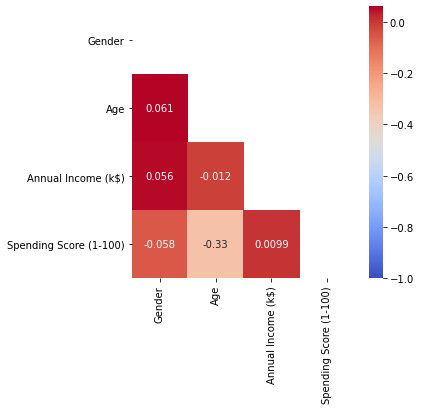

In [0]:
# Visualizing the correlation matrix 
plt.figure(figsize=(5,5))
mask = np.zeros_like(df_final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_final.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

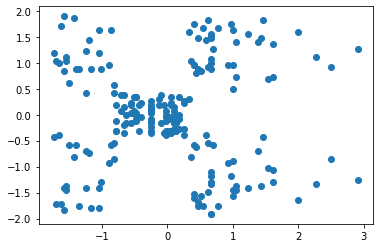

In [0]:
plt.scatter(df_final['Annual Income (k$)'], df_final['Spending Score (1-100)'])
X1 = df_final.drop(['Gender', 'Age'], axis = 1)

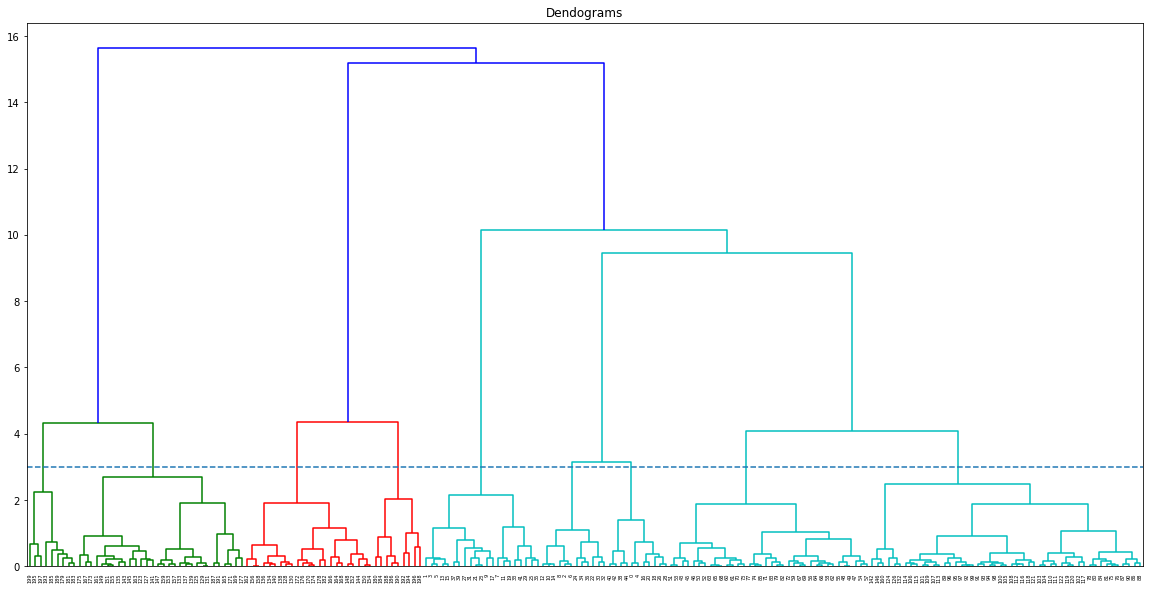

In [0]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1, method='ward'))
plt.title("Dendograms")
plt.axhline(linestyle='--', y=3) 
plt.show()

In [0]:
# Compute agglomeration
X1 = X1[["Annual Income (k$)", "Spending Score (1-100)"]].to_numpy()

# creating instance of our model
agglo_clus = AgglomerativeClustering(n_clusters=5, affinity="euclidean", 
                                     linkage="ward")
# fitting the initialized model
agglo_clus.fit(X1)

# getting the labels of the model
labels_agg = agglo_clus.labels_

# inspecting labels of top 10 data points
labels_agg[:200]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [0]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 5))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

Silhouette Coefficient: 0.554


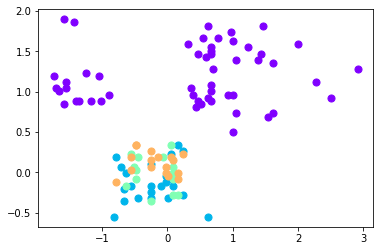

In [0]:
# coloring data points based on cluster
for i in range(5):
  plt.scatter(X1[labels==i, 0], X1[labels==i, 1], s=50, 
              color=colors[i], marker="o")
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X1, labels_agg))

In [0]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_agg, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_agg, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_agg, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_agg, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_agg, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X1, labels))


Estimated number of clusters: 4
Estimated number of noise points: 21
Homogeneity: 0.661
Completeness: 0.745
V-measure: 0.700
Adjusted Rand Index: 0.660
Adjusted Mutual Information: 0.691
Silhouette Coefficient: 0.406


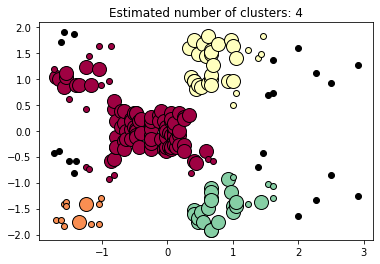

In [0]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

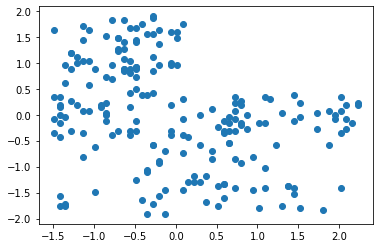

In [0]:
plt.scatter(df_final['Age'], df_final['Spending Score (1-100)'])
X2 = df_final.drop(['Gender', 'Annual Income (k$)'], axis = 1)

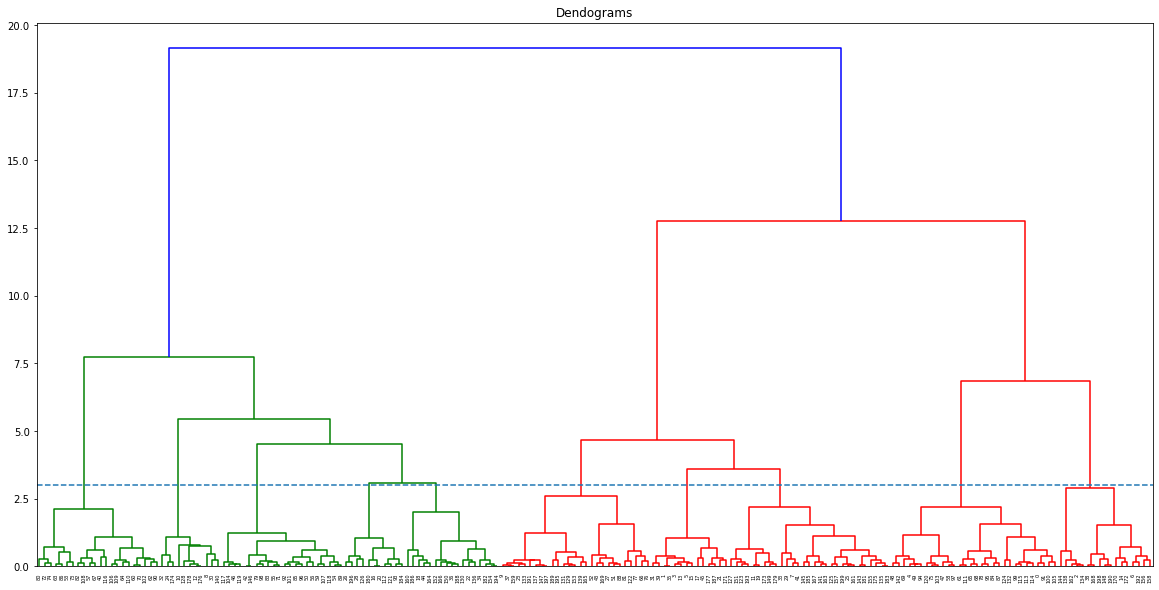

In [0]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X2, method='ward'))
plt.title("Dendograms")
plt.axhline(linestyle='--', y=3) 
plt.show()

In [0]:
# Compute agglomeration
X2 = X2[["Age", "Spending Score (1-100)"]].to_numpy()

# creating instance of our model
agglo_clus = AgglomerativeClustering(n_clusters=6, affinity="euclidean", 
                                     linkage="ward")
# fitting the initialized model
agglo_clus.fit(X2)

# getting the labels of the model
labels_agg = agglo_clus.labels_

# inspecting labels of top 10 data points
labels_agg[:200]

array([4, 0, 1, 0, 4, 0, 1, 0, 5, 0, 5, 0, 5, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 5, 0, 2, 0, 2, 0, 5, 0, 5, 0, 2, 0, 2, 0, 1, 0, 3, 0, 2, 0,
       2, 0, 2, 4, 4, 4, 2, 0, 0, 3, 2, 2, 2, 3, 4, 2, 3, 4, 3, 3, 3, 4,
       0, 3, 4, 4, 3, 2, 3, 3, 3, 4, 0, 0, 4, 2, 3, 0, 3, 2, 4, 2, 3, 4,
       0, 2, 3, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 3, 4, 2, 4, 3, 2, 3, 3,
       3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 0, 0, 4, 0, 2, 0, 5, 0, 2, 0,
       4, 0, 1, 0, 2, 0, 1, 0, 5, 0, 4, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0])

In [0]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 6))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e-01, 5.87785252e-01, 9.51056516e-01, 1.00000000e+00],
       [3.00000000e-01, 9.51056516e-01, 8.09016994e-01, 1.00000000e+00],
       [7.00000000e-01, 9.51056516e-01, 5.87785252e-01, 1.00000000e+00],
       [1.00000000e+00, 5.87785252e-01, 3.09016994e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

Silhouette Coefficient: 0.399


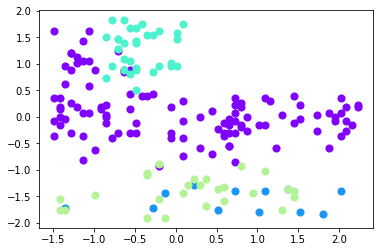

In [0]:
# coloring data points based on cluster
for i in range(6):
  plt.scatter(X2[labels==i, 0], X2[labels==i, 1], s=50, 
              color=colors[i], marker="o")
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2, labels_agg))

In [0]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=12).fit(X2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_agg, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_agg, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_agg, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_agg, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_agg, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X2, labels))


Estimated number of clusters: 2
Estimated number of noise points: 11
Homogeneity: 0.194
Completeness: 0.659
V-measure: 0.300
Adjusted Rand Index: 0.134
Adjusted Mutual Information: 0.280
Silhouette Coefficient: 0.223


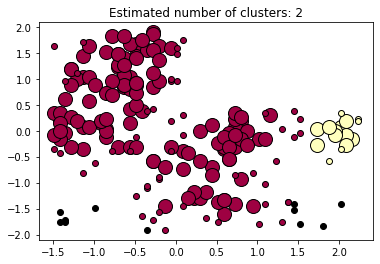

In [0]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()